# Case Study on Probability for Data Science

### Problem Statement:

To make a suitable machine learning algorithm to predict if the mushroom is edible or poisonous (e or p) using the given dataset.
(Along with other ML algorithms, Naïve Bayes’ Classifier should be applied)
Also, if some data pre-processing is necessary do that as well.

### Attribute Information:

* cap-shape: bell=b, conical=c, convex=x, flat=f, knobbed=k, sunken=s
* cap-surface: fibrous=f, grooves=g, scaly=y, smooth=s
* cap-colour: brown=n, buff=b, cinnamon=c, Gray=g, green=r, pink=p, purple=u, red=e, white=w, yellow=y
* bruises: bruises=t, no=f
* odour: almond=a, anise=l, creosote=c, fishy=y, foul=f, musty=m, none=n, pungent=p, spicy=s
* gill-attachment: attached=a, descending=d, free=f, notched=n
* gill-spacing: close=c, crowded=w, distant=d
* gill-size: broad=b, narrow=n
* gill-colour: black=k, brown=n, buff=b, chocolate=h, grey=g, green=r, orange=o, pink=p, purple=u, red=e, white=w, yellow=y
* stalk-shape: enlarging=e, tapering=t
* Stalk-root: bulbous=b, club=c, cup=u, equal=e, rhizomorphs=z, rooted=r, missing=?
* stalk-surface-above-ring: fibrous=f, scaly=y, silky=k, smooth=s
* stalk-surface-below-ring: fibrous=f, scaly=y, silky=k, smooth=s
* stalk-colour-above-ring: brown=n, buff=b, cinnamon=c, gray=g, orange=o, pink=p, red=e, white=w, yellow=y
* stalk-colour-below-ring: brown=n, buff=b, cinnamon=c, gray=g, orange=o, pink=p, red=e, white=w, yellow=y
* veil-type: partial=p, universal=u
* veil-colour: brown=n, orange=o, white=w, yellow=y
* ring-number: none=n, one=o, two=t
* ring-type: cobwebby=c, evanescent=e, flaring=f, large=l, none=n, pendant=p, sheathing=s, zone=z
* spore-print-colour: black=k, brown=n, buff=b, chocolate=h, green=r, orange=o, purple=u, white=w, yellow=y
* population: abundant=a, clustered=c, numerous=n, scattered=s, several=v, solitary=y
* habitat: grasses=g, leaves=l, meadows=m, paths=p, urban=u, waste=w, woods=d

In [475]:
#importing required libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [476]:
# importing data set in to python envirinment 
df= pd.read_csv("mushrooms.csv")

In [477]:
#first five rows of dataset
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [478]:
#Last five rows of dataset
df.tail()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
8119,e,k,s,n,f,n,a,c,b,y,...,s,o,o,p,o,o,p,b,c,l
8120,e,x,s,n,f,n,a,c,b,y,...,s,o,o,p,n,o,p,b,v,l
8121,e,f,s,n,f,n,a,c,b,n,...,s,o,o,p,o,o,p,b,c,l
8122,p,k,y,n,f,y,f,c,n,b,...,k,w,w,p,w,o,e,w,v,l
8123,e,x,s,n,f,n,a,c,b,y,...,s,o,o,p,o,o,p,o,c,l


In [479]:
#shape of the dataset
df.shape

(8124, 23)

As seen from above, our dataset has 23 columns. Each column has a different feature of the mushrooms which are the column names of the dataset

In [480]:
#columns present in the dataset
df.columns

Index(['class', 'cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number',
       'ring-type', 'spore-print-color', 'population', 'habitat'],
      dtype='object')

In [481]:
df.describe()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,...,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,...,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,...,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


In [482]:
df.duplicated().sum()

0

No duplicates records present in the data set

In [483]:
df.isnull().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

There is no null values present in the dataset

In [484]:
df.dtypes

class                       object
cap-shape                   object
cap-surface                 object
cap-color                   object
bruises                     object
odor                        object
gill-attachment             object
gill-spacing                object
gill-size                   object
gill-color                  object
stalk-shape                 object
stalk-root                  object
stalk-surface-above-ring    object
stalk-surface-below-ring    object
stalk-color-above-ring      object
stalk-color-below-ring      object
veil-type                   object
veil-color                  object
ring-number                 object
ring-type                   object
spore-print-color           object
population                  object
habitat                     object
dtype: object

In [485]:
#checking for any error values present in the dataset
for i in df.columns:
    print(i)
    print(df[i].value_counts())
    print("-------")

class
e    4208
p    3916
Name: class, dtype: int64
-------
cap-shape
x    3656
f    3152
k     828
b     452
s      32
c       4
Name: cap-shape, dtype: int64
-------
cap-surface
y    3244
s    2556
f    2320
g       4
Name: cap-surface, dtype: int64
-------
cap-color
n    2284
g    1840
e    1500
y    1072
w    1040
b     168
p     144
c      44
r      16
u      16
Name: cap-color, dtype: int64
-------
bruises
f    4748
t    3376
Name: bruises, dtype: int64
-------
odor
n    3528
f    2160
s     576
y     576
l     400
a     400
p     256
c     192
m      36
Name: odor, dtype: int64
-------
gill-attachment
f    7914
a     210
Name: gill-attachment, dtype: int64
-------
gill-spacing
c    6812
w    1312
Name: gill-spacing, dtype: int64
-------
gill-size
b    5612
n    2512
Name: gill-size, dtype: int64
-------
gill-color
b    1728
p    1492
w    1202
n    1048
g     752
h     732
u     492
k     408
e      96
y      86
o      64
r      24
Name: gill-color, dtype: int64
-------
stalk-sh

In [486]:
#stalk root column contain a "?" 
df["stalk-root"].unique()


array(['e', 'c', 'b', 'r', '?'], dtype=object)

In [487]:
#stalk root column contain a "?" 
# replacing it with"Un-identified
df["stalk-root"].replace({"?":"Un-identified"})

0                   e
1                   c
2                   c
3                   e
4                   e
            ...      
8119    Un-identified
8120    Un-identified
8121    Un-identified
8122    Un-identified
8123    Un-identified
Name: stalk-root, Length: 8124, dtype: object

In [488]:
df["stalk-root"].unique()

array(['e', 'c', 'b', 'r', '?'], dtype=object)

### Exploratory Data Analysis

In [489]:
#no.of classes counts
df["class"].value_counts()

e    4208
p    3916
Name: class, dtype: int64

###### Number of poisonous/edible mushrooms (e=edible, p=poisonous)

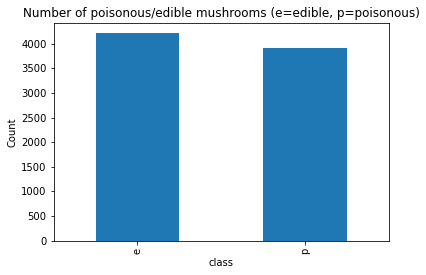

In [490]:
# checking dataset id balanced or not
plt.figure()
pd.Series(df['class']).value_counts().sort_index().plot(kind = 'bar')
plt.ylabel("Count")
plt.xlabel("class")
plt.title('Number of poisonous/edible mushrooms (e=edible, p=poisonous)');

######  pie charts of percentage unique values in - 'bruises'

No.of poisonous mushroom almost eqal to the no of eatable mushroom.Dataset id balanced

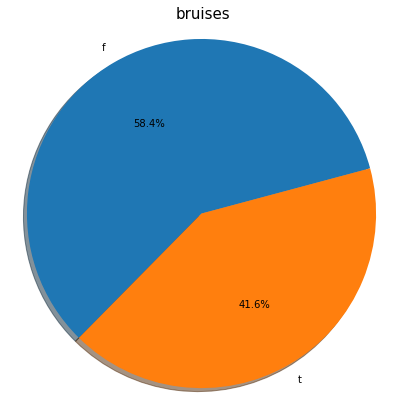

In [491]:
plt.pie(df['bruises'].value_counts(),labels=df['bruises'].value_counts().keys(), autopct='%1.1f%%', startangle=15, shadow = True)
plt.title('bruises', fontsize= 15)
plt.axis('equal')
fig = plt.gcf()
fig.set_size_inches(7,7)
plt.show()

######  Pie charts of percentage unique values in the following columns-  'odor', 'spore_print_color', 'population', 'habitat'

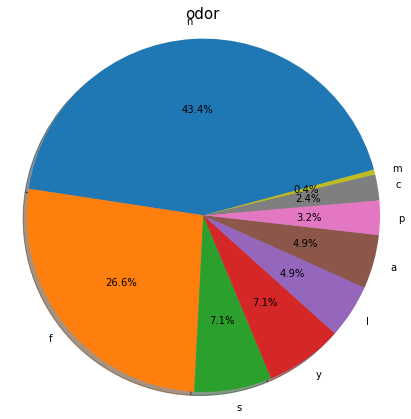

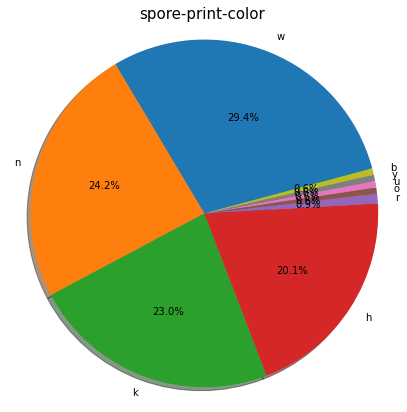

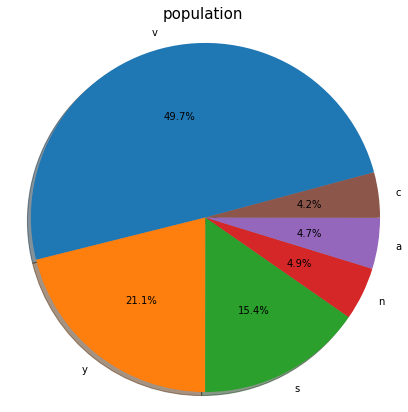

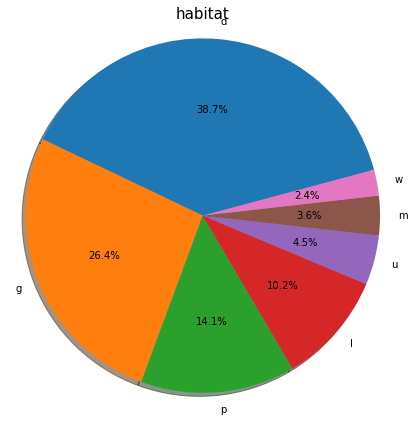

In [492]:
cols =['odor', 'spore-print-color', 'population', 'habitat']
for col in cols:
    plt.pie(df[col].value_counts(),labels=df[col].value_counts().keys(), autopct='%1.1f%%', startangle=15, shadow = True)
    plt.title(f'{col}', fontsize= 15)
    plt.axis('equal')
    fig = plt.gcf()
    fig.set_size_inches(7,7)
    plt.show()

###### Poisonous Mushroom with odor

In [493]:
#analysis with odor of mushroom
odor_dict={"a":"almond","l":"anise","c": "creosote","y": "fishy", "f":"foul","m": "musty","n": "none","p": "pungent","s": "spicy"}
df["odor"]=df["odor"].apply(lambda x:odor_dict[x])

In [494]:
#getting all poisinous mushroom odor
p_odor=df[df["class"]=="p"]["odor"].value_counts()

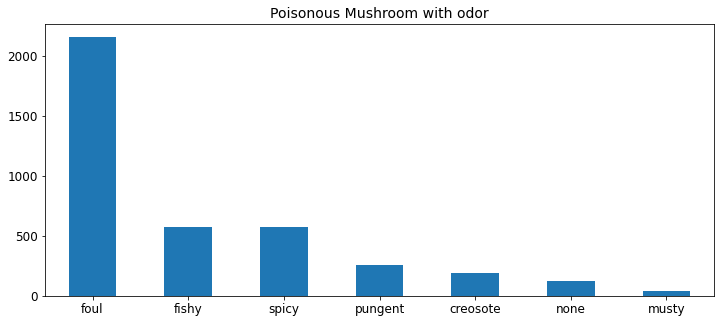

In [495]:
poi_odor=p_odor.plot(kind="bar",figsize=(12,5),fontsize=12)
poi_odor.set_title("Poisonous Mushroom with odor",fontsize=14)
poi_odor.tick_params(labelrotation=0)

* foul smelled mushroom is more poisonous 

###### Edible Mushroom with odor

In [496]:
#getting all edible mushroom odor
edible_odor=df[df["class"]=="e"]["odor"].value_counts()

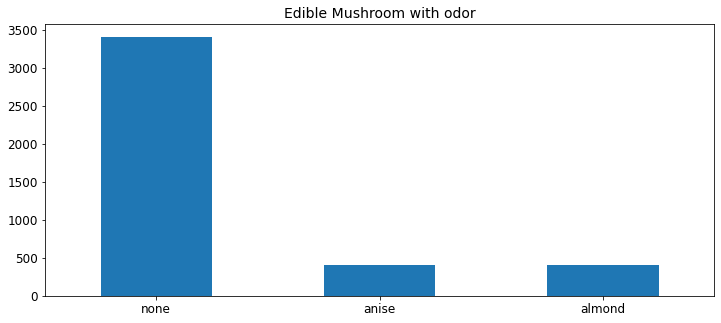

In [497]:
ed_odor=edible_odor.plot(kind="bar",figsize=(12,5),fontsize=12)
ed_odor.set_title("Edible Mushroom with odor",fontsize=14)
ed_odor.tick_params(labelrotation=0)

###### Edible Mushroom with their habitat

In [498]:
#analysis on habitat features
hab_dict={"g":"grasses","l":" leaves","m":" meadows", "p":"paths","u": "urban","w":" waste","d": "woods"}
df["habitat"]=df["habitat"].apply(lambda x:hab_dict[x])

In [499]:
##analysis on habitat  for edible mushroom
edible_hab=df[df["class"]=="e"]["habitat"].value_counts()

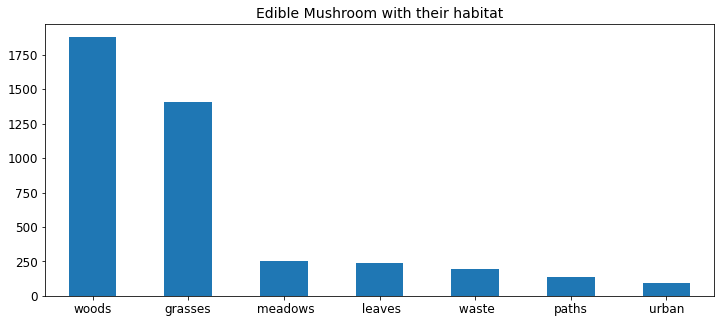

In [500]:
hab_ed=edible_hab.plot(kind="bar",figsize=(12,5),fontsize=12)
hab_ed.set_title("Edible Mushroom with their habitat",fontsize=14)
hab_ed.tick_params(labelrotation=0)

###### poisonous Mushroom with their habitat

In [501]:
#analysis on habitat  for poisonous mushroom
poisonous_hab=df[df["class"]=="e"]["habitat"].value_counts()

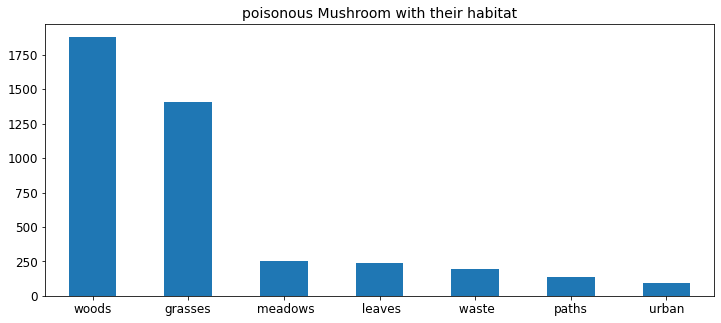

In [502]:
hab_poi=poisonous_hab.plot(kind="bar",figsize=(12,5),fontsize=12)
hab_poi.set_title("poisonous Mushroom with their habitat",fontsize=14)
hab_poi.tick_params(labelrotation=0)

### Preparing data

In [503]:
#model training
y=df["class"]
x=df.drop(["class","veil-type"],axis=1)
x.head()

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,x,s,n,t,pungent,f,c,n,k,e,...,s,s,w,w,w,o,p,k,s,urban
1,x,s,y,t,almond,f,c,b,k,e,...,s,s,w,w,w,o,p,n,n,grasses
2,b,s,w,t,anise,f,c,b,n,e,...,s,s,w,w,w,o,p,n,n,meadows
3,x,y,w,t,pungent,f,c,n,n,e,...,s,s,w,w,w,o,p,k,s,urban
4,x,s,g,f,none,f,w,b,k,t,...,s,s,w,w,w,o,e,n,a,grasses


In [504]:
y

0       p
1       e
2       e
3       p
4       e
       ..
8119    e
8120    e
8121    e
8122    p
8123    e
Name: class, Length: 8124, dtype: object

#### Encoding categorical data

##### Label encoding

In [505]:
from sklearn.preprocessing import LabelEncoder
label_encoder=LabelEncoder()
for column in x.columns:
    x[column]=label_encoder.fit_transform(x[column])
x.head()

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,5,2,4,1,7,1,0,1,4,0,...,2,2,7,7,2,1,4,2,3,5
1,5,2,9,1,0,1,0,0,4,0,...,2,2,7,7,2,1,4,3,2,3
2,0,2,8,1,1,1,0,0,5,0,...,2,2,7,7,2,1,4,3,2,1
3,5,3,8,1,7,1,0,1,5,0,...,2,2,7,7,2,1,4,2,3,5
4,5,2,3,0,6,1,1,0,4,1,...,2,2,7,7,2,1,0,3,0,3


* Poisonous = 1
* Eatable = 0

###### Getting dummy variables

In [506]:
x=pd.get_dummies(x,columns=x.columns,drop_first=True)
x.head()

,cap-shape_1,cap-shape_2,cap-shape_3,cap-shape_4,cap-shape_5,cap-surface_1,cap-surface_2,cap-surface_3,cap-color_1,cap-color_2,...,population_2,population_3,population_4,population_5,habitat_1,habitat_2,habitat_3,habitat_4,habitat_5,habitat_6
0,0,0,0,0,1,0,1,0,0,0,...,0,1,0,0,0,0,0,0,1,0
1,0,0,0,0,1,0,1,0,0,0,...,1,0,0,0,0,0,1,0,0,0
2,0,0,0,0,0,0,1,0,0,0,...,1,0,0,0,1,0,0,0,0,0
3,0,0,0,0,1,0,0,1,0,0,...,0,1,0,0,0,0,0,0,1,0
4,0,0,0,0,1,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [507]:
print(x.shape)
print(y.shape)

(8124, 95)
(8124,)


##### Splitting the dataset into the Training set and Test set

In [508]:
from sklearn.model_selection import train_test_split
#split the Dataset into train and test
x_train,x_test,y_train,y_test= train_test_split(x,y,random_state=42,test_size=0.25)

In [509]:
x_train.shape

(6093, 95)

In [510]:
x_test.shape

(2031, 95)

In [511]:
y_train.shape

(6093,)

In [512]:
y_test.shape

(2031,)

### Classification model

#### 1.Logistic regression classification

In [513]:
from sklearn.linear_model import LogisticRegression
#creating model instance
lr=LogisticRegression()
#fit the model in the training data
lr.fit(x_train,y_train)
#predictions
y_pred_lr=lr.predict(x_test)

In [514]:
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score,f1_score
confusion_matrix(y_test,y_pred_lr)

array([[1040,    0],
       [   0,  991]], dtype=int64)

In [515]:
print("Accuracy is:",accuracy_score(y_test,y_pred_lr))
print("precision is:",precision_score(y_test,y_pred_lr,average="macro"))
print("recall is",recall_score(y_test,y_pred_lr,average="macro"))
print("f1 is",f1_score(y_test,y_pred_lr,average="macro"))



Accuracy is: 1.0
precision is: 1.0
recall is 1.0
f1 is 1.0


In [516]:
lr.score(x_test,y_test)

1.0

In [517]:
t=[]
print("Test Accuracy:{}%".format(round(lr.score(x_test,y_test)*100,2)))
t.append(['Logestic Regession',(lr.score(x_test,y_test)*100)])

Test Accuracy:100.0%


In [518]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred_lr))

              precision    recall  f1-score   support

           e       1.00      1.00      1.00      1040
           p       1.00      1.00      1.00       991

    accuracy                           1.00      2031
   macro avg       1.00      1.00      1.00      2031
weighted avg       1.00      1.00      1.00      2031



Text(33.0, 0.5, 'Actual Labels')

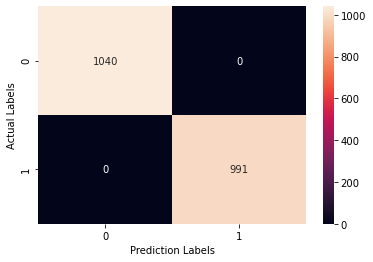

In [519]:
from sklearn.metrics import confusion_matrix
sns.heatmap(confusion_matrix(y_test,y_pred_lr),annot= True, fmt="g")
plt.xlabel("Prediction Labels")
plt.ylabel("Actual Labels")

##### 2.KNeighborsClassifier

In [520]:
#knn
from sklearn.neighbors import KNeighborsClassifier
acc_values=[]
neighbors=np.arange(3,15)
for k in neighbors:
    classifier=KNeighborsClassifier(n_neighbors=k,metric='minkowski')
    classifier.fit(x_train,y_train)
    y_pred_knn=classifier.predict(x_test)
    acc=accuracy_score(y_test,y_pred_knn)
    acc_values.append(acc)
   
    
   

Text(0, 0.5, 'accuracy')

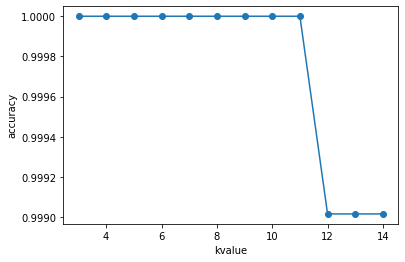

In [521]:
#which k value for highest accuracy
plt.plot(neighbors,acc_values,"o-")
plt.xlabel("kvalue")
plt.ylabel("accuracy")

In [522]:
confusion_matrix(y_test,y_pred_knn)

array([[1040,    0],
       [   2,  989]], dtype=int64)

In [523]:
print("Accuracy is:",accuracy_score(y_test,y_pred_knn))
print("precision is:",precision_score(y_test,y_pred_knn,average="macro"))
print("recall is",recall_score(y_test,y_pred_knn,average="macro"))
print("f1 is",f1_score(y_test,y_pred_knn,average="macro"))

Accuracy is: 0.999015263417036
precision is: 0.9990403071017274
recall is 0.9989909182643795
f1 is 0.9990146420982156


In [524]:
classifier=KNeighborsClassifier(n_neighbors=6,metric='minkowski')
classifier.fit(x_train,y_train)
y_pred_knn1=classifier.predict(x_test)

In [525]:
print("Accuracy is:",accuracy_score(y_test,y_pred_knn1))
print("precision is:",precision_score(y_test,y_pred_knn1,average="macro"))
print("recall is",recall_score(y_test,y_pred_knn1,average="macro"))
print("f1 is",f1_score(y_test,y_pred_knn1,average="macro"))

Accuracy is: 1.0
precision is: 1.0
recall is 1.0
f1 is 1.0


In [526]:
confusion_matrix(y_test,y_pred_knn1)

array([[1040,    0],
       [   0,  991]], dtype=int64)

In [527]:
print("Test Accuracy:{}%".format(round(classifier.score(x_test,y_test)*100,2)))
t.append(['KNN Classifier',(classifier.score(x_test,y_test)*100)])

Test Accuracy:100.0%


Text(33.0, 0.5, 'Actual Labels')

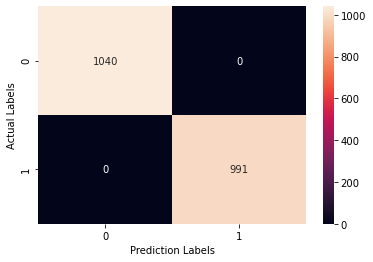

In [528]:
from sklearn.metrics import confusion_matrix
sns.heatmap(confusion_matrix(y_test,y_pred_knn1),annot= True, fmt="g")
plt.xlabel("Prediction Labels")
plt.ylabel("Actual Labels")

#### 3. DecisionTreeClassifier

In [529]:
from sklearn.tree import DecisionTreeClassifier
#create model instance
dtc=DecisionTreeClassifier()
#fit the model on the training data
dtc.fit(x_train,y_train)
#predictions
y_pred_dtc=dtc.predict(x_test)



In [530]:
confusion_matrix(y_test,y_pred_dtc)

array([[1040,    0],
       [   0,  991]], dtype=int64)

In [531]:
print("Accuracy is:",accuracy_score(y_test,y_pred_dtc))
print("precision is:",precision_score(y_test,y_pred_dtc,average="macro"))
print("recall is",recall_score(y_test,y_pred_dtc,average="macro"))
print("f1 is",f1_score(y_test,y_pred_dtc,average="macro"))


Accuracy is: 1.0
precision is: 1.0
recall is 1.0
f1 is 1.0


In [532]:
print("Test Accuracy:{}%".format(round(dtc.score(x_test,y_test)*100,2)))
t.append(['DecisionTreeClassifier',(dtc.score(x_test,y_test)*100)])

Test Accuracy:100.0%


In [533]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred_dtc))

              precision    recall  f1-score   support

           e       1.00      1.00      1.00      1040
           p       1.00      1.00      1.00       991

    accuracy                           1.00      2031
   macro avg       1.00      1.00      1.00      2031
weighted avg       1.00      1.00      1.00      2031



Text(33.0, 0.5, 'Actual Labels')

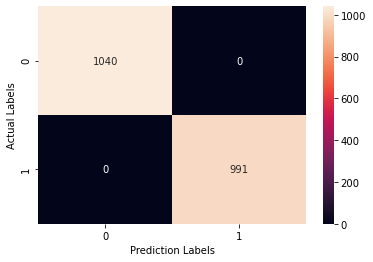

In [534]:
from sklearn.metrics import confusion_matrix
sns.heatmap(confusion_matrix(y_test,y_pred_dtc),annot= True, fmt="g")
plt.xlabel("Prediction Labels")
plt.ylabel("Actual Labels")

#### 4. svm Radial

In [535]:
from sklearn.svm import SVC
svm_r=SVC(kernel="rbf")
svm_r.fit(x_train,y_train)
y_pred_r=svm_r.predict(x_test)

In [536]:
confusion_matrix(y_test,y_pred_r)

array([[1040,    0],
       [   0,  991]], dtype=int64)

In [537]:
print("Accuracy is:",accuracy_score(y_test,y_pred_r))
print("precision is:",precision_score(y_test,y_pred_r,average="macro"))
print("recall is",recall_score(y_test,y_pred_r,average="macro"))
print("f1 is",f1_score(y_test,y_pred_r,average="macro"))


Accuracy is: 1.0
precision is: 1.0
recall is 1.0
f1 is 1.0


Text(33.0, 0.5, 'Actual Labels')

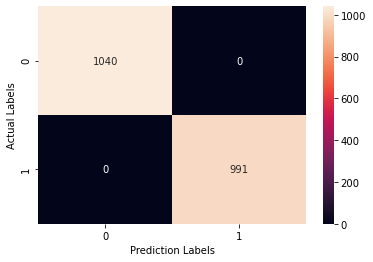

In [538]:
from sklearn.metrics import confusion_matrix
sns.heatmap(confusion_matrix(y_test,y_pred_r),annot= True, fmt="g")
plt.xlabel("Prediction Labels")
plt.ylabel("Actual Labels")

In [539]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred_r))

              precision    recall  f1-score   support

           e       1.00      1.00      1.00      1040
           p       1.00      1.00      1.00       991

    accuracy                           1.00      2031
   macro avg       1.00      1.00      1.00      2031
weighted avg       1.00      1.00      1.00      2031



In [540]:
print("Test Accuracy:{}%".format(round(svm_r.score(x_test,y_test)*100,2)))
t.append(['SVM Radial',(svm_r.score(x_test,y_test)*100)])


Test Accuracy:100.0%


#### 5. svm polynomial

In [541]:
from sklearn.svm import SVC
svm_poly=SVC(kernel="poly",degree=3)
svm_poly.fit(x_train,y_train)
y_pred_p=svm_poly.predict(x_test)

In [542]:
print("Accuracy is:",accuracy_score(y_test,y_pred_p))
print("precision is:",precision_score(y_test,y_pred_p,average="macro"))
print("recall is",recall_score(y_test,y_pred_p,average="macro"))
print("f1 is",f1_score(y_test,y_pred_p,average="macro"))


Accuracy is: 1.0
precision is: 1.0
recall is 1.0
f1 is 1.0


Text(33.0, 0.5, 'Actual Labels')

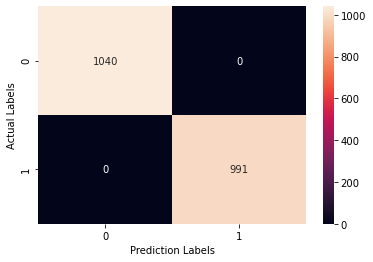

In [543]:
from sklearn.metrics import confusion_matrix
sns.heatmap(confusion_matrix(y_test,y_pred_p),annot= True, fmt="g")
plt.xlabel("Prediction Labels")
plt.ylabel("Actual Labels")

In [544]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred_p))

              precision    recall  f1-score   support

           e       1.00      1.00      1.00      1040
           p       1.00      1.00      1.00       991

    accuracy                           1.00      2031
   macro avg       1.00      1.00      1.00      2031
weighted avg       1.00      1.00      1.00      2031



In [545]:
print("Test Accuracy:{}%".format(round(svm_poly.score(x_test,y_test)*100,2)))
t.append(['SVM Polynomial',(svm_poly.score(x_test,y_test)*100)])

Test Accuracy:100.0%


#### 6.svm linear

In [546]:
from sklearn.svm import SVC
svm_linear=SVC(kernel="linear")
svm_linear.fit(x_train,y_train)
y_pred=svm_linear.predict(x_test)

In [547]:
print("Accuracy is:",accuracy_score(y_test,y_pred))
print("precision is:",precision_score(y_test,y_pred,average="macro"))
print("recall is",recall_score(y_test,y_pred,average="macro"))
print("f1 is",f1_score(y_test,y_pred,average="macro"))


Accuracy is: 1.0
precision is: 1.0
recall is 1.0
f1 is 1.0


In [548]:
print("Test Accuracy:{}%".format(round(svm_linear.score(x_test,y_test)*100,2)))
t.append(['SVM linear',(svm_linear.score(x_test,y_test)*100)])

Test Accuracy:100.0%


Text(33.0, 0.5, 'Actual Labels')

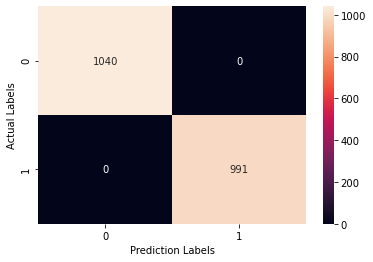

In [549]:
from sklearn.metrics import confusion_matrix
sns.heatmap(confusion_matrix(y_test,y_pred),annot= True, fmt="g")
plt.xlabel("Prediction Labels")
plt.ylabel("Actual Labels")

In [550]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           e       1.00      1.00      1.00      1040
           p       1.00      1.00      1.00       991

    accuracy                           1.00      2031
   macro avg       1.00      1.00      1.00      2031
weighted avg       1.00      1.00      1.00      2031



### Naive Bayes Classification

#### BernoulliNB

In [551]:
from sklearn.naive_bayes import BernoulliNB
classifier2 =BernoulliNB()
classifier2.fit(x_train,y_train)
y_prd=classifier2.predict(x_test)

In [552]:
print("Accuracy is:",accuracy_score(y_test,y_prd))
print("precision is:",precision_score(y_test,y_prd,average="macro"))
print("recall is",recall_score(y_test,y_prd,average="macro"))
print("f1 is",f1_score(y_test,y_prd,average="macro"))


Accuracy is: 0.9384539635647464
precision is: 0.9447629531632573
recall is 0.9370987929830008
f1 is 0.9380696162157957


In [553]:
print("Test Accuracy:{}%".format(round(classifier2.score(x_test,y_test)*100,2)))
t.append(['BernoulliNB',(classifier2.score(x_test,y_test)*100)])

Test Accuracy:93.85%


Text(33.0, 0.5, 'Actual Labels')

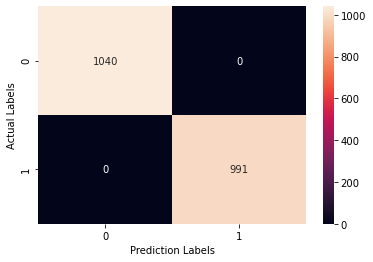

In [554]:
from sklearn.metrics import confusion_matrix
sns.heatmap(confusion_matrix(y_test,y_pred),annot= True, fmt="g")
plt.xlabel("Prediction Labels")
plt.ylabel("Actual Labels")

####  7.GaussianNB

In [555]:
from sklearn.naive_bayes import GaussianNB
classifier3=GaussianNB()
classifier3.fit(x_train,y_train)
y_pred_g=classifier3.predict(x_test)


In [556]:
print("Accuracy is:",accuracy_score(y_test,y_pred_g))
print("precision is:",precision_score(y_test,y_pred_g,average="macro"))
print("recall is",recall_score(y_test,y_pred_g,average="macro"))
print("f1 is",f1_score(y_test,y_pred_g,average="macro"))


Accuracy is: 0.9409158050221565
precision is: 0.945994599459946
recall is 0.9423076923076923
f1 is 0.9408435115244955


Text(33.0, 0.5, 'Actual Labels')

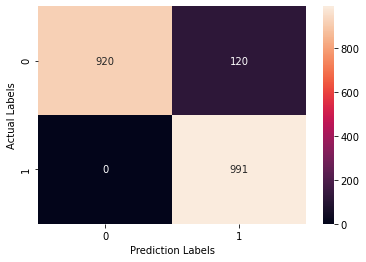

In [557]:
from sklearn.metrics import confusion_matrix
sns.heatmap(confusion_matrix(y_test,y_pred_g),annot= True, fmt="g")
plt.xlabel("Prediction Labels")
plt.ylabel("Actual Labels")

In [558]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred_g))

              precision    recall  f1-score   support

           e       1.00      0.88      0.94      1040
           p       0.89      1.00      0.94       991

    accuracy                           0.94      2031
   macro avg       0.95      0.94      0.94      2031
weighted avg       0.95      0.94      0.94      2031



In [559]:
print("Test Accuracy:{}%".format(round(classifier3.score(x_test,y_test)*100,2)))
t.append(['GaussianNB',(classifier3.score(x_test,y_test)*100)])

Test Accuracy:94.09%


#### 8.RandomForestClassifier

In [560]:
from sklearn.ensemble import RandomForestClassifier
rm=RandomForestClassifier()
rm.fit(x_train,y_train)
y_pred=rm.predict(x_test)


In [561]:
print("Accuracy is:",accuracy_score(y_test,y_pred))
print("precision is:",precision_score(y_test,y_pred,average="macro"))
print("recall is",recall_score(y_test,y_pred,average="macro"))
print("f1 is",f1_score(y_test,y_pred,average="macro"))


Accuracy is: 1.0
precision is: 1.0
recall is 1.0
f1 is 1.0


Text(33.0, 0.5, 'Actual Labels')

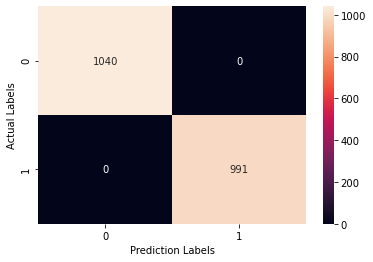

In [562]:
from sklearn.metrics import confusion_matrix
sns.heatmap(confusion_matrix(y_test,y_pred),annot= True, fmt="g")
plt.xlabel("Prediction Labels")
plt.ylabel("Actual Labels")

In [563]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           e       1.00      1.00      1.00      1040
           p       1.00      1.00      1.00       991

    accuracy                           1.00      2031
   macro avg       1.00      1.00      1.00      2031
weighted avg       1.00      1.00      1.00      2031



In [564]:
print("Test Accuracy:{}%".format(round(rm.score(x_test,y_test)*100,2)))
t.append(['RandomForestClassifier',(rm.score(x_test,y_test)*100)])

Test Accuracy:100.0%


#### 9.MultinomialNB

In [565]:
from sklearn.naive_bayes import MultinomialNB
classifier4= MultinomialNB()
classifier4.fit(x_train,y_train)
y_prd_m=classifier4.predict(x_test)

In [566]:
print("Accuracy is:",accuracy_score(y_test,y_prd_m))
print("precision is:",precision_score(y_test,y_prd_m,average="macro"))
print("recall is",recall_score(y_test,y_prd_m,average="macro"))
print("f1 is",f1_score(y_test,y_prd_m,average="macro"))

Accuracy is: 0.9532250123092073
precision is: 0.9570700334613469
recall is 0.9522112473802686
f1 is 0.9530265947695662


Text(33.0, 0.5, 'Actual Labels')

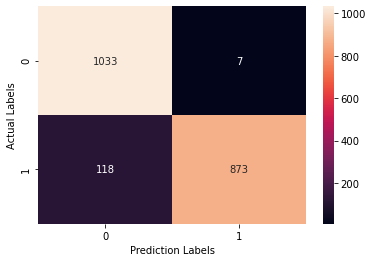

In [567]:
from sklearn.metrics import confusion_matrix
sns.heatmap(confusion_matrix(y_test,y_prd),annot= True, fmt="g")
plt.xlabel("Prediction Labels")
plt.ylabel("Actual Labels")

In [568]:
print("Test Accuracy:{}%".format(round(classifier4.score(x_test,y_test)*100,2)))
t.append(['MultinomialNB',(classifier4.score(x_test,y_test)*100)])

Test Accuracy:95.32%


#### Performance of models

In [569]:
df3=pd.DataFrame(t, columns=["Algorithms","Accuracy"])
df3

,Algorithms,Accuracy
0,Logestic Regession,100.000000
1,KNN Classifier,100.000000
2,DecisionTreeClassifier,100.000000
3,SVM Radial,100.000000
4,SVM Polynomial,100.000000
5,SVM linear,100.000000
6,BernoulliNB,93.845396
7,GaussianNB,94.091581
8,RandomForestClassifier,100.000000
9,MultinomialNB,95.322501


### Conclusion:
* Dataset is balanced dataset .



*  Most of the classification model produce 100% accuracy. i,e,Logestic Regession, KNN Classifier, DecisionTreeClassifier, SVM Radial,SVM Polynomial,SVM linear	and Random Forest Classifier produce 100% accuracy than other models.


* Naïve Bayes’ Classifier(BernoulliNB,GaussianNB,MultinomialNB) gave less prediction Accuracy as compared to other ML algorithm model.so it is better to go with other algorithm other than  Naïve Bayes’ for predicting  the mushroom is edible or poisonous (e or p) using the given dataset


    

In [570]:
#submitted by VARSHA M